# Pythonによる統計分析の基本2

## 分析の準備

In [13]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pmdarima as pm

# グラフ描画のライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## 2変量データの分析（数量×カテゴリー）

In [16]:
df2 = pd.read_csv('sample_data/2-3-2-sample-data-2.csv')
print(df2.head(3))

       x category
0  9.624        A
1  7.388        A
2  7.472        A


### 統計量の計算

In [17]:
# 統計量
print(df2.groupby('category').describe())

             x                                                           
         count      mean       std    min     25%    50%      75%     max
category                                                                 
A         15.0  7.923867  1.256656  5.698  7.3135  7.678   8.9995   9.745
B         15.0  9.868733  2.328365  6.698  7.6575  9.631  11.6695  13.434


### 可視化

<Axes: xlabel='x', ylabel='Count'>

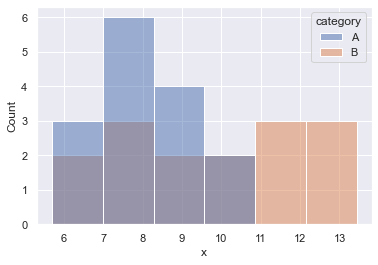

In [18]:
sns.histplot(x='x', hue='category', data=df2)

<Axes: xlabel='category', ylabel='x'>

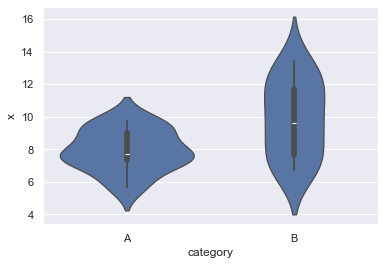

In [19]:
sns.violinplot(x='category', y='x', data=df2)

### 平均値の差の区間推定

In [21]:
# 平均値の差の区間推定
print(df2.query('category == "A"').head(3))
print(df2.query('category == "B"').head(3))

       x category
0  9.624        A
1  7.388        A
2  7.472        A
        x category
15  6.700        B
16  9.483        B
17  7.366        B


### データの分割

In [22]:
category_a = df2.query('category == "A"')["x"]
category_b = df2.query('category == "B"')["x"]

In [23]:
#平均値の差の信頼区間
dsw2_a = sm.stats.DescrStatsW(category_a)
dsw2_b = sm.stats.DescrStatsW(category_b)

cm = sm.stats.CompareMeans(dsw2_a, dsw2_b)
np.round(cm.tconfint_diff(alpha=0.05, usevar='unequal'), 3)

array([-3.363, -0.526])

### 平均の差に対するt検定

In [26]:
# t値、p値、dfが出力される
np.round(cm.ttest_ind(usevar='unequal', alternative='two-sided'), 3)

array([-2.8470e+00,  1.0000e-02,  2.1518e+01])

In [27]:
# t値、p値、dfが出力される
np.round(sm.stats.ttest_ind(
    category_a, category_b, 
    usevar='unequal', alternative='two-sided'), 3)

array([-2.8470e+00,  1.0000e-02,  2.1518e+01])